# Bathroom to Bedroom Ratio
In this note book we investigate whether the number of bathrooms per bedroom provides any additional predictive power beyond the number of bedrooms.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import RegressionAnalysis

In [2]:
df = pd.read_csv('data/cleaned.csv').query('bedrooms < 10 and 10*5 < price < 2*10**6')

In [3]:
bedBath = df[['bedrooms', 'bathrooms']].copy()
bedBath['bath_per_bed'] = df['bathrooms'] / df['bedrooms']
bedBath['log_price'] = df['price'].apply(np.log10)
bedBath.head()

,bedrooms,bathrooms,bath_per_bed,log_price
0,3,1.00,0.333333,5.346157
1,3,2.25,0.750000,5.730782
2,2,1.00,0.500000,5.255273
3,4,3.00,0.750000,5.781037
4,3,2.00,0.666667,5.707570


In [4]:
data1 = bedBath.drop(['bathrooms'], axis=1)
model1 = RegressionAnalysis.Model(data1, 'log_price')

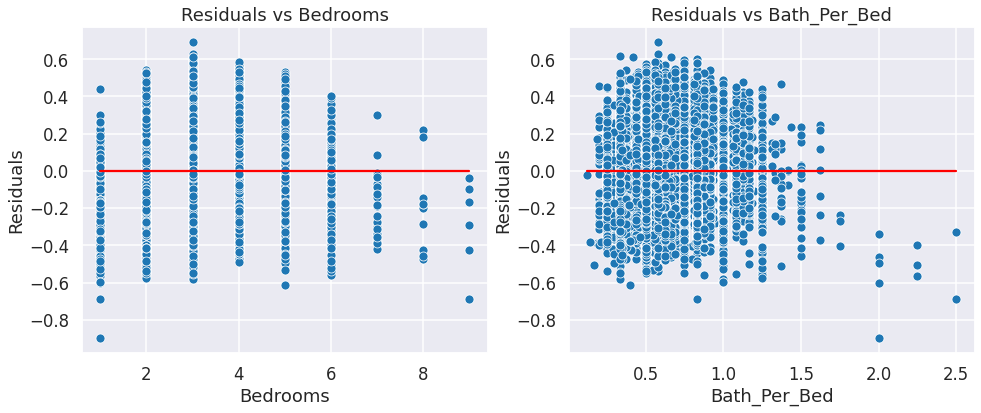

In [5]:
residuals_inputs_plot1 = model1.plot_residuals_against_inputs()

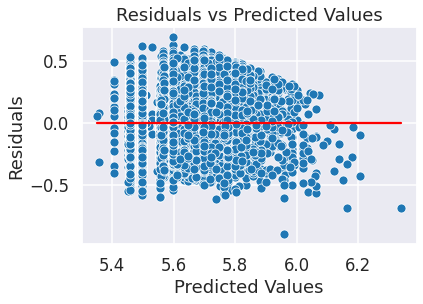

In [6]:
residuals_predictions_plot1 = model1.plot_residuals_against_prediction()

In [7]:
model1.compute_vif()

{'bedrooms': 5.11, 'bath_per_bed': 5.11}

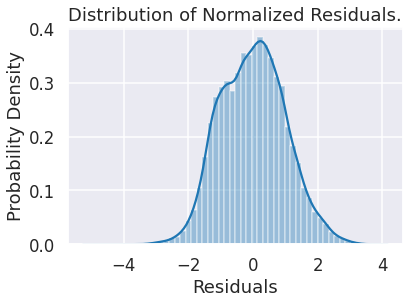

In [8]:
residual_distribution1 = model1.plot_residuals_distribution()

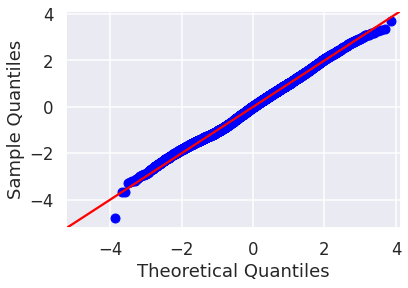

In [9]:
residual_qq_plot1 = model1.plot_residuals_normal_qq()

In [10]:
data2 = bedBath.drop(['bath_per_bed'], axis=1)
model2 = RegressionAnalysis.Model(data2, 'log_price')

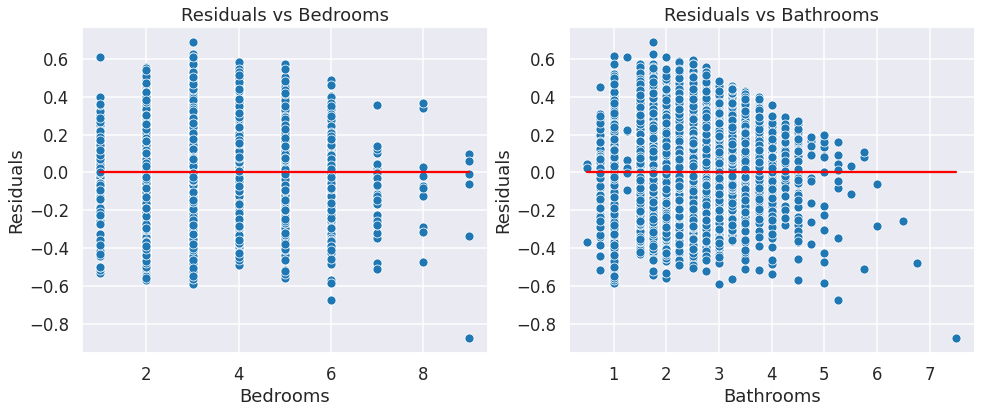

In [11]:
residuals_inputs_plot2 = model2.plot_residuals_against_inputs()

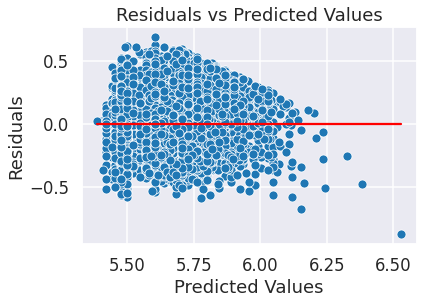

In [12]:
residuals_predictions_plot2 = model2.plot_residuals_against_prediction()

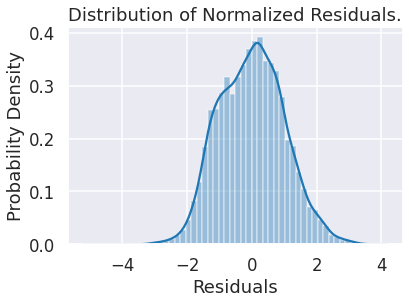

In [13]:
residual_distribution_plot2 = model2.plot_residuals_distribution()

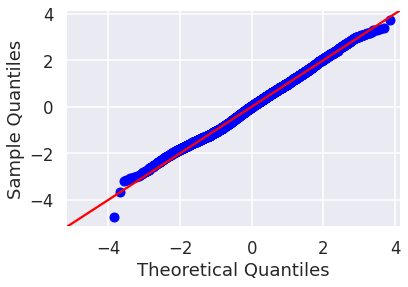

In [14]:
residual_qq_plot2 = model2.plot_residuals_normal_qq()

In [15]:
model2.compute_vif()

{'bedrooms': 11.44, 'bathrooms': 11.44}

In [16]:
data3 = bedBath.drop(['bath_per_bed', 'bathrooms'], axis=1)
model3 = RegressionAnalysis.Model(data3, 'log_price')

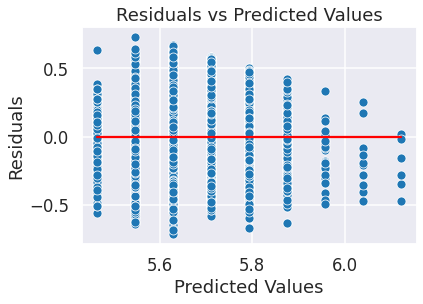

In [17]:
residuals_predictions_plot3 = model3.plot_residuals_against_prediction()

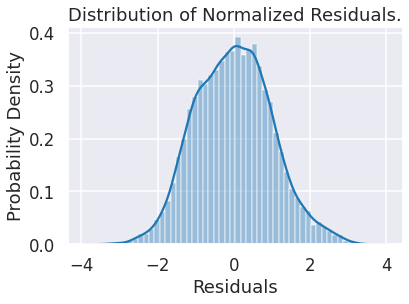

In [18]:
residual_distribution3 = model3.plot_residuals_distribution()

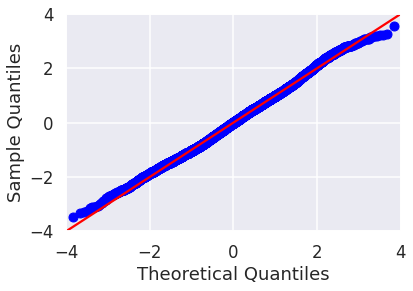

In [19]:
residual_qq_plot3 = model3.plot_residuals_normal_qq()

## Conclusion 
The number of baths per bedroom reduces vif substantially compared to model 2 and outperforms model 3 in terms of r2